# Lab 4: Statistical Interpretation of Uncertainty {-}

Name:

## Activity I Pendulum Period (33 points)

### Equipment needed
1. 1.5-meter-long pendulum.
2. Stopwatch (the one on your phone will do)

### Goal (Overview)
Each student will measure the period of a 1.5-meter-long pendulum 10 times. This will result in a set of ~150 data points for the whole class.  We will then calculate the acceleration due to gravity for each measurement and calculate the  i) mean, ii) standard deviation, and iii) standard deviation of the mean and use these results to report an appropriate uncertainty.

### Procedure
1. A pendulum that is 1.5 meters long will be set up at the front of the class. Each person should measure the period of the pendulum with a stopwatch 10 times. Data should be recorded to the nearest 0.01 s.  For the best results try to keep the pendulum's amplitude consistent for all of the measurements, even by restarting as necessary.  The amplitude should be relatively small (less than about $10^\circ$).  The pendulum should be swinging (rather than at rest) when the time measurement begins.
2. Record your 10 measurements in the google sheets link provided below.
3. Once everyone has collected their measurements someone needs to move all of the data into a single column.  Then download the file to your computer, saving it as a .csv file.  Then use the `np.loadtxt()` function to read this data into Python. Do this on line 7 of the code cell below.  (Remember: The file must be located in the same directory as this Jupyter notebook.)
4. The acceleration due to gravity can be calculated from $$ g = {4 \pi^2 L \over T^2}$$ On line 9 of the code cell below calculate the acceleration due to gravity for each period measurement in the data set. To include $\pi$ in your calculation use `np.pi`.
5. Use the equations given in the reading above to calculate the mean, standard deviation, and standard deviation of the mean.  Perform these calculations on lines 10, 11, and 12 of the code cell below.  Use `np.sum()` to perform summations and `np.sqrt()` to perform square root functions.
6. On lines 14,15, and 16 in the code cell below use the functions `stats.mean()` and `stats.stdev()` to calculate the mean, standard deviation, and standard deviation of the mean.  
7. Construct a dataframe of data with the period located in the first column and the values of g in the second column.
8. A statistical analysis of the data can be generated using `dataframe.describe()`, which creates a new dataframe containing often used statistics.  Do this on line.  
7. Add a formatted print statement  to report an appropriate value for $g$ with its uncertainty.
8. Plot a histogram of the g values.  
9. The normal distribution is given by $$ N(x) = {1\over \sigma \sqrt{2 \pi}} e^{-(x- \mu)^2\over 2 \sigma^2}$$. Plot this distribution on top of the histogram. Verify that the limiting distribution matches the histogram.  
10. Calculate the p-value for this dataset using $g= 9.8$ as the expected value.  State whether the deviation of your experimental results are significant enough (at the $5\%$ level ) to reject the experiment. Do this on line 22 in the code cell below.

[Pendulum Data](https://docs.google.com/spreadsheets/d/1A2Xb7dDaDxjSH8YzRn0-Lb2er6qxWySYjmuLK-yiP4w/edit?usp=sharing)

,Period (s),g (m/s^2)
0,2.1304,9.133279
1,2.1334,9.107611
2,2.1294,9.141859
3,2.1460,9.000976
4,2.1508,8.960845
...,...,...
175,2.1276,9.157334
176,2.1326,9.114445
177,2.1238,9.190133
178,2.1206,9.217890


,Period (s),g (m/s^2)
count,180.000000,180.000000
mean,2.133417,9.136515
std,0.082933,0.485412
min,2.000000,4.972735
25%,2.113350,9.097374
50%,2.122600,9.200527
75%,2.134600,9.281244
max,2.887200,10.363085


TtestResult(statistic=-18.33821178559097, pvalue=5.861716607695701e-43, df=179)


(array([0.10306484, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05153242, 0.        , 0.        ,
        0.        , 0.        , 0.05153242, 0.        , 0.05153242,
        0.20612968, 0.51532421, 0.82451874, 2.37049137, 3.19501011,
        1.03064842, 0.61838905, 0.20612968, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05153242]),
 array([ 4.97273479,  5.08054179,  5.18834878,  5.29615578,  5.40396278,
         5.51176977,  5.61957677,  5.72738377,  5.83519076,  5.94299776,
         6.05080476,  6.15861175,  6.26641875,  6.37422575,  6.48203274,
         6.58983974,  6.69764674,  6.80545373,  6.91326073,  7.02106773,
         7.12887472,  7.23

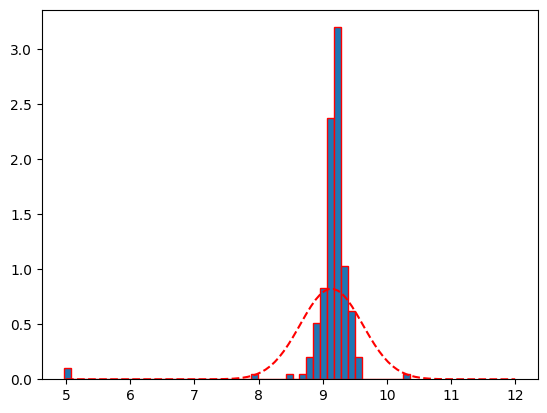

In [27]:
#| eval: false
#| echo: true

import numpy as np
import statistics as stats
import math as mt
from scipy.stats import ttest_1samp
from pandas import DataFrame
from matplotlib import pyplot as plt

%matplotlib inline
L = 1.05
T =   2*np.genfromtxt("Pendulum_Data.csv") # Line 7
N = len(T)     # Find the number of data points.
g =  4 * np.pi**2 * L/T**2          # Line 9
meanG = sum(g)/N       # Line 10
stdG =  np.sqrt(sum((g - meanG)**2)/N)       # Line 11
stdMeanG = stdG/np.sqrt(N)    # Line 12

μ = stats.mean(g)           # Line 14 
σ = stats.stdev(g)           # Line 15
σ_μ = σ/np.sqrt(N)         # Line 16

df =  DataFrame(np.transpose([T,g]),columns = ["Period (s)", "g (m/s^2)"])# Construct a dataframe with periods in the first column and g-values in the second. (Line 18)
display(df)
summary =  df.describe()#Construct a summary dataframe containing often-used statistics (Line 20)
display(summary)
p_value = ttest_1samp(g,9.8)     # Line 22
print(p_value)


# Plot the histogram and Normal distribution below.
x = np.linspace(5,12,100)
y = 1/(σ * np.sqrt(2 * np.pi)) * np.exp(-((x - μ)**2/(2 * σ**2)))
plt.plot(x,y,'r--')
plt.hist(g,bins = 50,edgecolor = "red",density = True)


## Activity II - Radioactivity (33 points)

### Equipment needed
1. Geiger Counter
2. Radioactive sample (don't worry, they aren't active enough to be dangerous)
3. LabQuest mini box with USB cable.
4. Logger Pro software.  You can download a copy for your personal machine ([windows](https://www.vernier.com/d/yxoaa) or [mac](https://www.vernier.com/d/u7caf) ) or use one of the lab computers which have Logger Pro installed already.

### Goal (Overview)
We will use the electronic radiation monitor to measure the number of decays for a radiocative sample. We will calculate the mean and standard deviation of the data and make a histogram of the data.  The Poisson distribution will be plotted on top of the histogram to show it as the limiting distribution.

### Procedure
1. Using the Vernier Radiation Monitor, measure the decays of a radioactive sample.  Below you will find the instructions for setting up the Vernier Radiation Monitor to your laptop.  Use 10-second intervals and make 100 measurements.  
2. Copy the data from Logger Pro to an Excel spreadsheet and save the worksheet.(The worksheet should have only one column of data.  Don't include the time data in the Excel worksheet.)
3. Use the equation above for the mean ($\mu$) to calculate the mean of the data and the equation below to calculate the standard deviation of the data. $$\sigma = \sqrt{\mu}$$. Perform these calculations on lines 7 and 8 in the code cell below.
4. Add a formatted print statement to report the appropriate count number with its associated uncertainty.
5. One line 11 of the code cell below, produce a histogram just as we did together in activity I. Choose `bins = ` so that the histogram displays a sufficient amount of detail.
6. The limiting distribution for this kind of data is called a Poisson distribution (equation given below).  It is only defined for integer values of the argument and it is hard to plot using standard plotting techniques.  I have provided the code to plot this function in the code cell below.  You may have to modify the numbers on line 14 to plot over the appropriate range.  $$P(x) = e^{-\mu} {\mu^x \over x!} $$

>Instructions for using the Vernier Radiation Monitor:

>1. Connect the Vernier Radiation Monitor to the DIG 1 port of the LabQuest Mini.
>2. Connect the USB cord from the LabQuest Mini to your laptop.
>3. Within the LoggerPro software, do the following:
>   1. Select Experiment -> Data Collection and change the duration to 1000 seconds.
   
   
   
   <img src="https://github.com/lancejnelson/PH121/raw/gh-pages/files/LoggerProRadiation.png" alt="drawing" width="600px"/>

In [ ]:
#| eval: false
#| echo: true
from scipy.stats import poisson,norm
from numpy import arange
from matplotlib import pyplot as plt

data =  #Load the data from file (Line 5)

μ =   # Calculate mean (Line 7)
σ =   # Calculate standard deviation (Line 8)

              
              # Construct Histogram (Line 11)

dist = poisson(μ)
x = arange(0,40)    # Line 14: May have to modify these numbers.
ax.plot(x,dist.pmf(x))
plt.show()


## Activity III - Projectile Range (33 points)

### Goal (Overview)
This activity is identical in nature to Activity I.  Instead of measuring the period of a pendulum, we will measure the range of a projectile.  The analysis of the data will be very similar to that performed in Activity I.  

### Setup
1. As a class, pick some launch conditions.  These must include the launch angle, launch power setting, and initial height.  Pick one person to write these launch conditions on the whiteboard at the front of the class.
2. Setup the cannon in a location where everyone in the class can access it and perform measurements.  

### Procedure
1. Using the launch conditions chosen in step 1, predict the range of the steel ball.  Perform the calculations in the code cell below. 
2. Using the projectile launcher, fire a steel ball 10 times per student and measure the range in meters.  
3. Again, we will pool our data together as a class to increase the size of the dataset.  Therefore, it is very important that every student launches **under the same conditions** and every students' measurements are free of bias.  Add your data to the Google sheets document linked below.
4. When all the data is collected, have Python read the data set using `np.genfromtxt()` just as you did in activity I.
5. Calculate the mean, standard deviation, and standard deviation of the mean using your preferred calculation method. (Either with `stats.mean()` and `stats.stdev()` ,using the equations given above, or using a python dataframe.)
6. Plot a histogram of the data.  Choose `bins =` appropriately so the histogram displays with sufficient detail.
7. Plot the normal distribution on top to verify that it is the limiting distribution.
8. Add a formatted print statement to report the particle's range with its associated uncertainty.
9. Calculate the p-value for your data set using the predicted range from part 1 as your expected value. State whether the deviation of your experimental results are significant enough (at the $5\%$ level ) to reject the experiment. 

No template code cell will be provided for this activity (hopefully you are feeling more and more comfortable writing simple code on your own), but you can copy/paste from previous activities if needed.

[Projectile Data](https://docs.google.com/spreadsheets/d/1frC8Yy7TK7fDN_z7E-1BQEOr6knhIZweFHdOTky6TQM/edit?usp=sharing)


0.04082459684135038
The range of the projectile is  3.87 +- 0.02 meters.


(array([0.15534705, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.31069409, 0.        , 1.08742932, 0.62138818,
        1.08742932, 1.7088175 , 2.33020568, 1.86416454, 2.79624682,
        3.417635  , 2.01951159, 1.24277636, 0.46604114, 0.15534705,
        1.24277636, 0.        , 0.        , 0.        , 0.15534705]),
 array([1.98  , 2.0284, 2.0768, 2.1252, 2.1736, 2.222 , 2.2704, 2.3188,
        2.3672, 2.4156, 2.464 , 2.5124, 2.5608, 2.6092, 2.6576, 2.706 ,
        2.7544, 2.8028, 2.8512, 2.8996, 2.948 , 2.9964, 3.0448, 3.0932,
        3.1416, 3.19  , 3.2384, 3.2868, 3.3352, 3.3836, 3.432 , 3.4804,
        3.5288, 3.5772, 3.6256

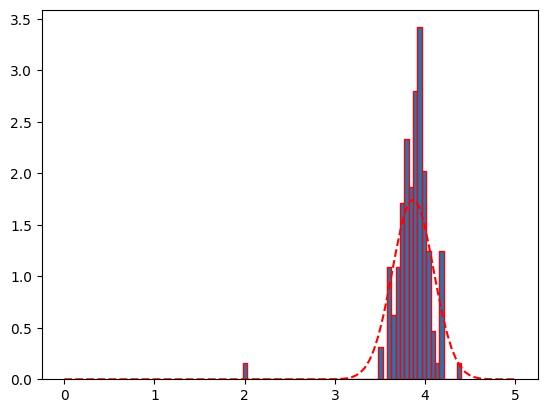

In [35]:
# Put code here

yi = 1.2
θ = 35 * np.pi/180
vi = 5.25
g = 9.8

t = (-vi * np.sin(θ) - np.sqrt(vi**2 * np.sin(θ)**2 + 2 *g *yi))/(-g)
xf = vi * np.cos(θ) * t     

d =   2*np.genfromtxt("Projectile.csv") # Line 7
N = len(T)     # Find the number of data points.

μ = stats.mean(d)           # Line 14 
σ = stats.stdev(d)           # Line 15
σ_μ = σ/np.sqrt(N)         # Line 16

p_value = ttest_1samp(d,xf)     # Line 22
print(p_value.pvalue)

print(f"The range of the projectile is {μ:5.2f} +- {σ_μ:3.2f} meters.")
# Plot the histogram and Normal distribution below.
x = np.linspace(0,5,100)
y = 1/(σ * np.sqrt(2 * np.pi)) * np.exp(-((x - μ)**2/(2 * σ**2)))
plt.plot(x,y,'r--')
plt.hist(d,bins = 50,edgecolor = "red",density = True)
